# Predicción de la Longitud de Pétalo de Iris

![Descripción](../../resources/08-nn.png)

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [131]:
iris =datasets.load_iris()

In [132]:
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [147]:
session = tf.Session()

In [148]:
seed = 19
tf.set_random_seed(seed)
np.random.seed(seed)

In [149]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [150]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [151]:
def normalize_col(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

In [152]:
x_vals_train = np.nan_to_num(normalize_col(x_vals_train))
x_vals_test = np.nan_to_num(normalize_col(x_vals_test))

In [153]:
batch_size = 50
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

In [154]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [155]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_ouput = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [156]:
loss = tf.reduce_mean(tf.square(y_target-final_ouput))

In [157]:
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)

In [158]:
init = tf.global_variables_initializer()
session.run(init)

In [159]:
loss_vect = []
test_loss = []
for i in range(500):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(np.sqrt(temp_loss))
    
    temp_loss_test = session.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(temp_loss_test))
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", Loss = "+str(temp_loss))

Paso #50, Loss = 1.6490943
Paso #100, Loss = 0.753927
Paso #150, Loss = 0.37688148
Paso #200, Loss = 0.2609328
Paso #250, Loss = 0.1612782
Paso #300, Loss = 0.1196633
Paso #350, Loss = 0.13303255
Paso #400, Loss = 0.08356404
Paso #450, Loss = 0.07679031
Paso #500, Loss = 0.11238382


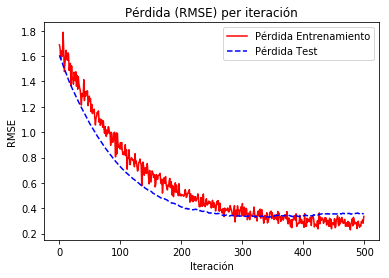

In [160]:
plt.plot(loss_vect, "r-", label="Pérdida Entrenamiento")
plt.plot(test_loss, "b--", label ="Pérdida Test")
plt.title("Pérdida (RMSE) per iteración")
plt.xlabel("Iteración")
plt.ylabel("RMSE")
plt.legend(loc ="upper right")
plt.show()

In [161]:
print(session.run(A1))

[[ 0.28867388  1.1863989   0.40323654 -1.7298566   0.05262265]
 [ 0.60556823 -0.13005193 -0.86067665  0.4986664  -0.6880324 ]
 [-0.0416694   0.8565033  -2.6885211   0.37603995  0.9071763 ]]


In [162]:
print(session.run(b1))

[-1.4939437   0.11688621  1.1069413   1.4885042  -0.47595045]


In [163]:
print(session.run(A2))

[[-0.38038772]
 [ 1.4345706 ]
 [ 0.03475337]
 [ 0.316863  ]
 [-0.0858974 ]]


In [164]:
print(session.run(b2))

[-0.5458701]
